## Data Exploration 


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
df_bom_gross = pd.read_csv('zippedData/bom.movie_gross.csv.gz', compression='gzip')
df_bom_gross.sort_values('domestic_gross', ascending = False)

,title,studio,domestic_gross,foreign_gross,year
1872,Star Wars: The Force Awakens,BV,936700000.0,"1,131.6",2015
3080,Black Panther,BV,700100000.0,646900000,2018
3079,Avengers: Infinity War,BV,678800000.0,"1,369.5",2018
1873,Jurassic World,Uni.,652300000.0,"1,019.4",2015
727,Marvel's The Avengers,BV,623400000.0,895500000,2012
...,...,...,...,...,...
1975,Surprise - Journey To The West,AR,NaN,49600000,2015
2392,Finding Mr. Right 2,CL,NaN,114700000,2016
2468,Solace,LGP,NaN,22400000,2016
2595,Viral,W/Dim.,NaN,552000,2016


Looking at the movie budgets data, I want to see if i can get a sense of movies with highest return on investment. I need to convert the budget columns into integers and then add a column calculating return on investment. I am using domestic numbers only, assuming Microsoft will want to start their venture in the US before going global. Similar to the IMDB data I am cleaning out older movies, and adding year and month columns so I can further analyze the data

In [3]:
df_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv.gz', compression='gzip')
df_budgets['release_date'] = pd.to_datetime(df_budgets['release_date'])
df_budgets['release_year'] = df_budgets['release_date'].dt.year
df_budgets['release_month'] = df_budgets['release_date'].dt.month
df_budgets = df_budgets[(df_budgets['release_year'] >= 2014)]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [4]:
df_budgets['production_budget'] = df_budgets['production_budget'].map(lambda price: int(price.replace("$", "").replace(",", "")))
df_budgets['domestic_gross'] = df_budgets['domestic_gross'].map(lambda price: int(price.replace("$", "").replace(",", "")))
df_budgets['worldwide_gross'] = df_budgets['worldwide_gross'].map(lambda price: int(price.replace("$", "").replace(",", "")))
df_budgets['domestic_roi'] = df_budgets['domestic_gross'] / df_budgets['production_budget']

In [37]:
df_budgets.sort_values(['domestic_roi'], ascending = False).head(20)
df_roi = df_budgets.groupby(['release_year'])['domestic_roi'].mean()
df_roi = df_roi.reset_index()

release_year
2014    1.432386
2015    1.653406
2016    1.599537
2017    1.980350
2018    2.077434
2019    1.224815
2020    0.000000
Name: domestic_roi, dtype: float64

In [52]:
df_roi_mo = df_budgets.groupby(['release_month'])['domestic_roi'].mean()
df_roi_mo = df_roi_mo.reset_index()
df_roi_mo

,release_month,domestic_roi
0,1,1.620346
1,2,1.628038
2,3,1.932508
3,4,1.876318
4,5,1.389633
5,6,1.424333
6,7,4.815236
7,8,1.648232
8,9,1.030946
9,10,1.628045


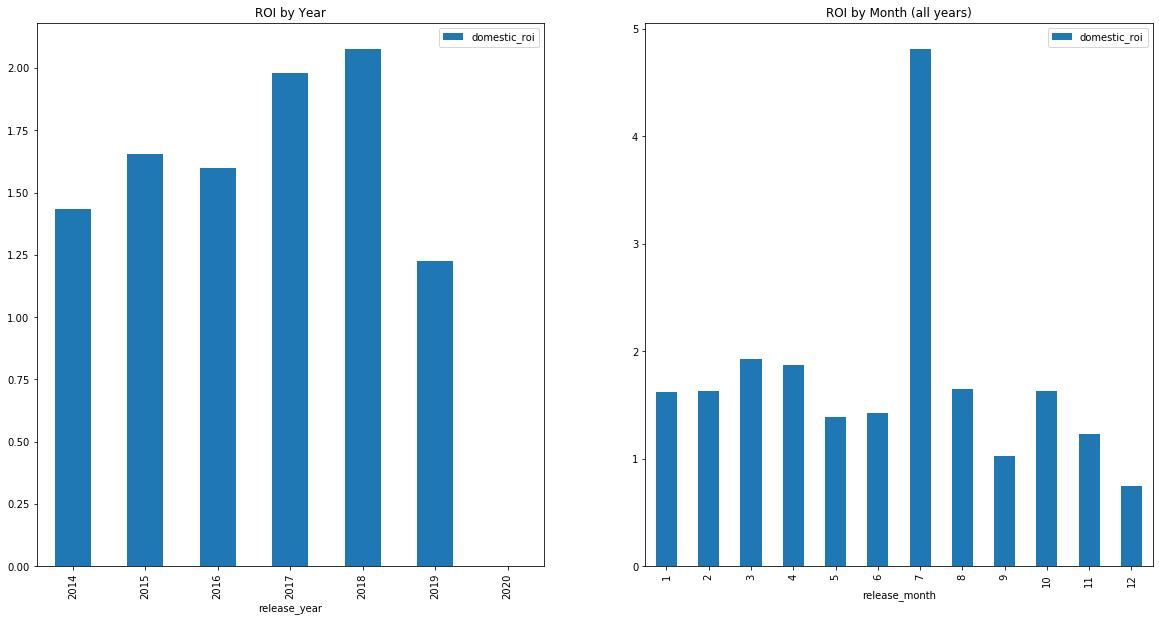

In [56]:
plt.figure(figsize=(20, 10))
ax1 = plt.subplot(1, 2, 1)
x = df_roi['release_year']
y = df_roi['domestic_roi']

df_roi.plot(x='release_year', y='domestic_roi', ax=ax1, kind = 'bar')


ax2 = plt.subplot(1,2,2)
df_roi_mo.plot(x='release_month', y='domestic_roi', ax=ax2, kind = 'bar')
ax1.set_title('ROI by Year')
ax2.set_title('ROI by Month (all years)')

plt.show()

So let's aim for our movie to come out in July! What are some big releases from Julys past?

In [77]:
df_july_movies = df_budgets[df_budgets['release_month'] == 7].sort_values(['domestic_roi'], ascending = False)
df_july_movies.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_roi,release_year,release_month
5679,80,2015-07-10,The Gallows,100000,22764410,41656474,227.644100,2015,7
5685,86,2017-07-07,A Ghost Story,100000,1594798,2769782,15.947980,2017,7
4254,55,2016-07-22,Lights Out,5000000,67268835,148806510,13.453767,2016,7
5228,29,2018-07-20,Unfriended: Dark Web,1000000,8866745,16434588,8.866745,2018,7
3770,71,2014-07-18,The Purge: Anarchy,9000000,71562550,111534881,7.951394,2014,7


NameError: name 'xy' is not defined

<Figure size 720x432 with 0 Axes>

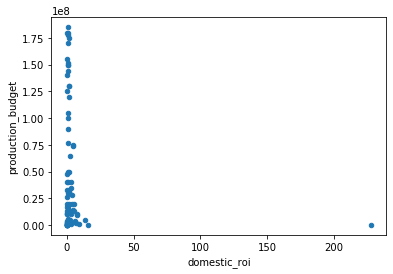

In [76]:
plt.figure(figsize=(10, 6))
df_july_movies.plot(x='domestic_roi', y='production_budget', kind = 'scatter')
plt.annotate(xy, df_july_movies['movie'])